<a href="https://colab.research.google.com/github/SherZhou/Computational-Physics/blob/main/3_2_Time_dependent_Schr%C3%B6dinger_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import animation

<font  face=Times color=darkblue size=3>Next, we consider time-dependent Schrodinger equation:$$i\hbar\frac{\partial}{\partial t}\psi(t,x)=H(x)\psi(t,x)$$
<br><br>Using Crank-Nicolson Scheme, the equation can be written as:$$i\hbar\frac{\psi^{n+1}_r-\psi^{n}_r}{\tau}=\sum_{s=1}^NH_{r,s}\frac{1}{2}(\psi_s^n+\psi_s^{n+1})$$
with $H_{r,s}=-\frac{\hbar^2}{2m}\frac{\delta_{r+1,s}+\delta_{r-1,s}-2\delta_{r,s}}{h^2}+V(x_r)\delta_{r,s}$
<br><br>Further:$$\psi^{n+1}=(1+\frac{i\tau}{2\hbar}H)^{-1}(1-\frac{i\tau}{2\hbar}H)\psi^n$$
<br><br>Initial condition:$\psi(t=0,x)=\frac{1}{\sqrt{\sigma_0\sqrt{2\pi}}}e^{ik_0x}e^{-\frac{1}{2}\frac{(x-x_0)^2}{2\sigma_0^2}}$,
<br>$\hbar=m=1,x_0=-10,L=40,\sigma_0=1,k_0=7,N=401,\tau=0.0002,h=L/N$, and the potential V inside to be 0.

In [ ]:
#set parameters
hbar=1
m=1
x0=-10
L=40
sigma0=1
k0=7
N=400
tau=0.03
tn=600
h=L/N
x_list=[]
for i in range(N):
    x_list.append(i*h-L/2)

In [ ]:
psi_list=np.zeros((tn,N),dtype=np.complex64)
#set psi_0
for i in range(N):
    psi_list[0,i]=(1/np.sqrt(sigma0*np.sqrt(np.pi)))*np.exp((1j)*k0*(x_list[i]-x0))*np.exp(-0.5*np.power(x_list[i]-x0,2)/(np.power(sigma0,2)))

In [ ]:
sum=0
for i in psi_list[0]:
    sum+=abs(i)**2*h
print('as the sum of possibility is:',sum,'we can say it is normalized')

as the sum of possibility is: 0.9999999825424379 we can say it is normalized


In [ ]:
#build the H matrix (add V)
matrix_H=np.zeros((N,N))
#first row
matrix_H[0,0]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[0,1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#last row
matrix_H[N-1,N-1]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[N-1,N-2]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#other rows
for i in range(1,N-1):
    matrix_H[i,i]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
    matrix_H[i,i+1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    matrix_H[i,i-1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    if 170<i<230:
        matrix_H[i,i]+=((k0**2)*np.cos(np.pi*x_list[i]/6))/2

In [ ]:
# the new matrix in the formula
mat_1plus_inv=np.linalg.inv(np.identity(N)+((1j*tau)/(2*hbar))*matrix_H)
mat_1minus=np.identity(N)-((1j*tau)/(2*hbar))*matrix_H

In [ ]:
for i in range(1,tn):
    psi_list[i]=np.dot(np.dot(mat_1plus_inv,mat_1minus),psi_list[i-1].reshape(N,1)).reshape(N,)

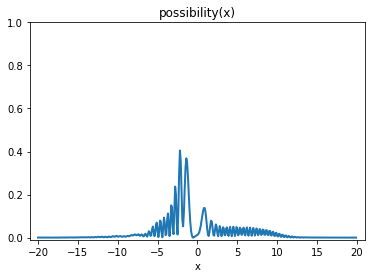

In [ ]:
fig2, ax2 = plt.subplots()
line2, = ax2.plot([], [], lw=2)
plt.xlim(-21,21)
plt.ylim(-0.01,1.0)
ax2.set_xlabel('x')
ax2.set_title('possibility(x)')
def animate2(i):
    xx=x_list
    yy=abs(psi_list[i*4])**2
    line2.set_data(xx, yy)
    return (line2,)
anim2 = animation.FuncAnimation(fig2, animate2, frames=150, interval=150, blit=True)
rc('animation', html='jshtml')
anim2